In [1]:
import pandas as pd
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
    121,118,124,121,125,115,115,119,118,121,117,117,120,120,
    121,117,118,117,123,118,124,121,115,118,125,115])
sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
    134,134,124,140,134,129,129,138,134,124,122,126,133,127,
    130,130,130,132,117,130,125,129,133,120,127,123])
   

In [11]:
oncesi.columns = ["a"]
oncesi.head()

,a
0,123
1,119
2,119
3,116
4,123


In [12]:
sonrasi.columns = ["a"]
sonrasi.head()

,a
0,118
1,127
2,122
3,132
4,129


In [44]:
import numpy as np
ö = pd.DataFrame(np.arange(len(oncesi)))
s = pd.DataFrame(np.arange(len(sonrasi)))
ö[:] = "ÖNCESİ"
ö = pd.concat([oncesi,ö],axis = 1)
s[:] = "SONRASI"
s = pd.concat([sonrasi,s],axis = 1)
ös = pd.concat([ö,s],ignore_index = True)
ös.columns = ["PERFORMANS","GRUP"]
print(ös.head())
print(ös.tail())

   PERFORMANS    GRUP
0         123  ÖNCESİ
1         119  ÖNCESİ
2         119  ÖNCESİ
3         116  ÖNCESİ
4         123  ÖNCESİ
    PERFORMANS     GRUP
75         129  SONRASI
76         133  SONRASI
77         120  SONRASI
78         127  SONRASI
79         123  SONRASI


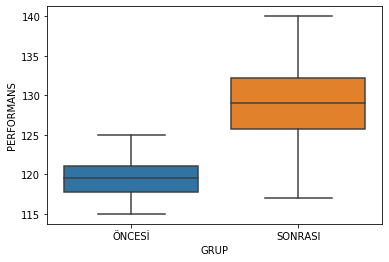

In [46]:
import seaborn as sns
sns.boxplot(x = "GRUP",y = "PERFORMANS" , data = ös);

In [56]:
#varsayım kontrolü
ö_s = pd.concat([oncesi,sonrasi],axis = 1)
ö_s.columns = ["ö","s"]
from scipy.stats import shapiro
shapiro(ö_s["ö"])

(0.9543656706809998, 0.10722451657056808)

In [57]:
shapiro(ö_s["s"])

(0.9780089259147644, 0.6159515380859375)

In [59]:
shapiro(ös["PERFORMANS"])
#BURDA NORMAL GÖZÜKMEZKEN TEK TEKTE NORMAL OLDUĞUNU GÖRDÜĞÜMÜZ İÇİN TEK TEK DAHA DOĞRUDUR

(0.9456883072853088, 0.0019684573635458946)

In [58]:
import scipy.stats as stats
stats.levene(ö_s["ö"],ö_s["s"])
#varyans hipotezi doğru değil fakat bu bazı durumlarda göz ardı edilebilir

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

In [60]:
#Hipotez Testi
stats.ttest_rel(ö_s.ö,ö_s.s)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [76]:
pvalue = stats.ttest_rel(ö_s.ö,ö_s.s)[1]
print("%.4f" % pvalue)

0.0000


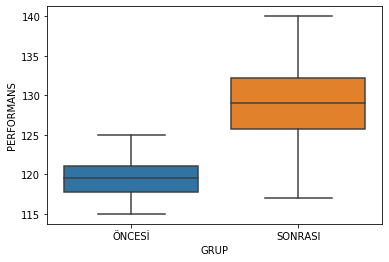

In [61]:
#p-value değeri 0.05'ten küçük olduğu için hipotez reddedilir.
#Görselleştirme tekniklerini kullanarak farklılığın hangi yönde olduğu tespit edilir
sns.boxplot(x = "GRUP",y = "PERFORMANS" , data = ös);

In [77]:
"""Bu grafiğe göre sonrasındaki performanslar daha yüksektir ve hipotez
testimizde de farklılığın anlamlı olduğunu doğruladığımız için eğitim işe
yaradığını söyleyebiliriz.
"""

'Bu grafiğe göre sonrasındaki performanslar daha yüksektir ve hipotez\ntestimizde de farklılığın anlamlı olduğunu doğruladığımız için eğitim işe\nyaradığını söyleyebiliriz.\n'

Nonparametrik Bağımlı İki Örneklem T Testi

In [78]:
#varsayımların ikiside sağlanmazsa
stats.wilcoxon(ö_s["ö"],ö_s["s"])

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)